Hey! This notebook has been further analysed in my presentation. If you have any questions about how it works or tips on improving it for further education please let me know at khanmomin2468@gmail.com! 

As for optimization, though I always welcome criticism of major errors and/or optimization paths, the purpose of this notebook is solely to educate and not total accuracy. 

Thank you so much, enjoy!

The dataset used in this presentation is further explained by the diagnosis.names file, provided graciously by Dr. Jacek Czerniak, Ph.D. at the Polish Academy of Sciences Systems Research Institute. This dataset was specifically chosen due to its relative ease of understanding, small size and real-life connection. Its easier to see the power of machine learning to help people when the data is medical rather than just creating some image recognition program. 

From here on out, all comments made are in relation to the code. Good luck!

The section below is simply for importing libraries. The libraries we will be using today are: 

    - Tensorflow (https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html)

    - Numpy (https://numpy.org/doc/stable/user/whatisnumpy.html)

    - Pandas (https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/)

    - Matplotlib (https://matplotlib.org/)

For a more detailed analysis of what each library does I highly suggest you click the links above. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras.constraints import max_norm
from keras.utils import np_utils
from keras.datasets import cifar10
from sklearn.preprocessing import LabelEncoder
#used for display purposes
import pandas as pd
import matplotlib.pyplot as plt
import os

Numpy is one of the most used libraries out there, used for list and array management, matrix data structures, and basically any mathematical function you could possibly need

Pandas is a library used for data analysis. Much like numpy, pandas is used for its extremely useful data structures (i.e dataframes). However unlike numpy, pandas is primarily used for data analysis, data structuring and manipulation (i.e merging, reshaping, cleaning and selecting). 

You can imagine pandas as "Data representation and morphing" and numpy as "Array management and the math work-horse"

Matplotlib is simply there to display any data I would need to show. Graphs. Thats all its for. Graphs. 

The big boy of the group is Tensorflow: 
https://www.tensorflow.org/tutorials/keras/classification

Above is a tutorial on how to start on your very first machine learning algorithm. Though it does a good job explaining how to do machine learning, I'll be honest I find diagnosing diseases to be more interesting and engaging. Sue me. 

Tensorflow is a "end to end open source platform for machine learning" (source: tensorflow.org)

What that means is that from start to end, everything machine learning related is possible through this API. It is highly optimized and very user friendly. I highly recommend anyone starting with machine learning to NOT START HERE!!!

Although the allure of "fast and easy" is strong, it will slow you down in the long run. Tensorflow ends up doing so much for you its difficult to fully understand the concepts behind much of what is going on. Functions like ReLU, Softmax, forward prop and backwards prop become merely words and requirements rather than fundamental functions to be understood. 

Going forward however, for the purposes of not scaring people away we will be using tensorflow. 

In [2]:
filename = os.path.abspath("data\diagnosis.csv")
data = pd.read_csv(filename, names= ["Temp", "Nausea", "Lumbar", "Urine", "micturition", "burning", "decision1", "decision2"])
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

After that word vomit above, from here on out the comments will be as short as possible, don't worry. 

Above we are simply pulling the data from a csv (provided), then converting it to an numpy array. This will make it possible to do some much needed linear algebra. Spooky, I know. But trust me, you will find that it is not too much to understand. 

We then pull the data's shape (column and row), then randomly shuffle the data. One thing to understand is that, much like the graph named "overfit.png", the more you train a machine learning algorithm on the exact same data, the more it becomes molded to that set of data. In other words, the algorithm over-fits and ends up creating less accurate results when shown data it has never seen. 

In [3]:
data_dev = data[0:int(m/2)].T
Y_dev = data_dev[(n-2):n]
X_dev = data_dev[0:(n-2)]

for i in range(len(Y_dev)):
    x = 0
    for y in Y_dev[i]:
        
        if "no" in y:
            y = 0
        else:
            y = 1
        Y_dev[i][x] = y
        x+=1 
Y_labels = []
for i in range(len(Y_dev[0])):
    temp = [Y_dev[0][i], Y_dev[1][i]]
    if temp == [0,0]:
        temp = 0
    if temp == [0,1]:
        temp = 1
    if temp == [1,0]:
        temp = 2
    if temp == [1,1]:
        temp = 3
    Y_labels.append(temp)
Y_dev = Y_labels
for i in range(len(X_dev)-1):

    for y in range(len(X_dev[i])):
        if "no" in X_dev[i+1][y]:
            temp = 0
        else:
            temp = 1
        X_dev[i+1][y] = temp
i=0
for x in X_dev[0]:
    x = x.replace("," , ".")  
    X_dev[0][i] = float((x))/42
    i+=1

data_train = data[int(m/2):m].T
Y_train = data_train[(n-2):n]
X_train = data_train[0:(n-2)]
i = 0
for i in range(len(Y_train)):
    x = 0
    for y in Y_train[i]:
        
        if "no" in y:
            y = 0
        else:
            y = 1
        Y_train[i][x] = y
        x+=1 
Y_labels = []
for i in range(len(Y_train[0])):
    temp = [Y_train[0][i], Y_train[1][i]]
    if temp == [0,0]:
        temp = 0
    if temp == [0,1]:
        temp = 1
    if temp == [1,0]:
        temp = 2
    if temp == [1,1]:
        temp = 3
    Y_labels.append(temp)
Y_train = Y_labels
for i in range(len(X_train)-1):
    
    for y in range(len(X_train[i])):
        if "no" in X_train[i+1][y]:
            temp = 0
        else:
            temp = 1
        X_train[i+1][y] = temp
i = 0
for x in X_train[0]:
    try:    
        x = x.replace("," , ".")  
    except:
        x = x
    X_train[0][i] = float((x))/42
    i+=1





print("THIS IS THE HEAD OF Y_DEV:\n")
print(Y_dev[:2])
print("THIS IS THE HEAD OF X_DEV:\n")
print(X_dev[:2])

THIS IS THE HEAD OF Y_DEV:

[1, 0]
THIS IS THE HEAD OF X_DEV:

[[0.9761904761904762 0.8928571428571429 0.9761904761904762
  0.8999999999999999 0.9571428571428572 0.9380952380952381
  0.9738095238095238 0.8999999999999999 0.8976190476190476
  0.8714285714285714 0.8809523809523809 0.980952380952381
  0.9666666666666667 0.9857142857142857 0.9761904761904762
  0.9523809523809523 0.8976190476190476 0.9690476190476192
  0.888095238095238 0.9666666666666667 0.8952380952380953
  0.9166666666666666 0.9523809523809523 0.980952380952381
  0.9619047619047618 0.9880952380952381 0.8999999999999999
  0.9619047619047618 0.9023809523809524 0.888095238095238
  0.9666666666666667 0.9214285714285715 0.9523809523809523
  0.8809523809523809 0.8928571428571429 0.9619047619047618
  0.8928571428571429 0.9523809523809523 0.8857142857142858
  0.8642857142857142 0.8809523809523809 0.9523809523809523
  0.8571428571428571 0.8761904761904761 0.9880952380952381
  0.8809523809523809 0.8785714285714286 0.89523809523809

Now, having taken the data from the csv, we now need to make it useable to the machine learning algorithm. 

For our purposes, we want everything to be between 1 and 0. In this case, yes's and no's are 1's and 0's, and the temperature is "normalized" and made such that all values are between 1 and 0. This is done by dividing all values by the highest value in the array. 

This makes everything so much easier to do in the future, and is also a common practice in the industry for applicable datasets. 

On top of this, we have seperated the data into two sections. X and Y. X is all of the data we recieved from the patient, those being: "Temperature", "Nausea", "Lumbar Pain", "Urine pushing", "micturition pains", "burning".

Y is all of the results. This is an array of the final diagnosis made by the doctor: was it either "Inflammation of urinary bladder", "Nephritis of renal pelvis origin", neither or both? 

We have then further split the data into "Developmental" or otherwise known as "validation" data, and "training" data. 

To train the machine, we feed it the X_train array. It will then come up with a pseudo-random answer in the very beginning. The error will be very high, calculated by checking if the output of the algorithm matches the real answer (Y_train). Once a sufficient enough amount of cycles is completed of this constant error checking and correction, the algorithm then checks with the validation data (data it has never seen) to make sure that the algorithm outputs the right answers. 

In [4]:
X_train = X_train.astype("float32").T
X_dev = X_dev.astype("float32").T

Y_train = np_utils.to_categorical(Y_train)
Y_dev = np_utils.to_categorical(Y_dev)
class_num = Y_dev.shape[1]
print(X_dev.shape)
print(X_train.shape)
print(Y_dev.shape)
print(Y_train.shape)

(60, 6)
(60, 6)
(60, 4)
(60, 4)


At a most simple level, the algorithm works under a hidden layer of nodes, all interconnected until there is a layer of output nodes. Each node corresponds to a possible answer, and whicever node has the highest value is the most likely answer. 

We have also now "categorized" the Y arrays (the answers). This makes it so that the output can be understood quickly by simply seeing what the output number is. 

To_categorical converts an array of unique answers and creates an array much like the one below, with each column representing one possible answer. This is also known as one-hot encoding. 

In [5]:
demo = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
demo = tf.constant(demo, shape=[4, 4])
print(demo)

tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


In [6]:
model = keras.Sequential()
model.add(tf.keras.Input(shape = (6,)))
model.add(keras.layers.Dense(32, activation='relu')) #the 32 stands for the output size of the array
model.add(keras.layers.Dense(4,activation='sigmoid'))
model.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________
None


Above is the meat and potatoes. The reason you and I are here. 

So, from the top. We will be designing a sequential model. This is that typical model you will see depicted as a mesh of neurons (see neurondiagram.jpeg). This means each layer output feeds into the next layer until the output layer is reached. 

The first layer is the input layer, with an input dimension of 6. This is because for each patient, there is 6 variables we are inputting for every output. (6 columns in X_train)

The second layer is just an extra one put in as a "hidden" layer. Depending on the nature of your data (i.e the amount, the variance within), having more or less layers is better. Plus, the more layers exist, the more computationally intensive the algorithm will be. For now, we will only have one hidden layer. 

The activation is a bit complicated, but for now you can take it as how "bright" each neuron is based on an input. 

Finally you compile the model. 



Epoch 1/200
1/1 [==============================] - 0s 486ms/step - loss: 0.6666 - accuracy: 0.3167 - val_loss: 0.6433 - val_accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 0.6574 - accuracy: 0.2333 - val_loss: 0.6372 - val_accuracy: 0.3833
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6510 - accuracy: 0.3000 - val_loss: 0.6324 - val_accuracy: 0.3833
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6458 - accuracy: 0.3000 - val_loss: 0.6283 - val_accuracy: 0.4333
Epoch 5/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6414 - accuracy: 0.4167 - val_loss: 0.6246 - val_accuracy: 0.4667
Epoch 6/200
1/1 [==============================] - 0s 18ms/step - loss: 0.6373 - accuracy: 0.4500 - val_loss: 0.6211 - val_accuracy: 0.4833
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 0.6335 - accuracy: 0.5000 - val_loss: 0.6179 - val_accuracy: 0.5333
Epoch 8/200
1/1 [==

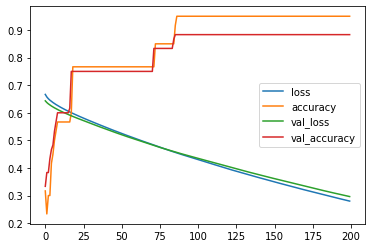

In [7]:

history = model.fit(X_train, Y_train, validation_data=(X_dev, Y_dev), epochs=200, batch_size=64)
"""Problem with this method is that the testing data is the same as the validation data. 
Prefferably you would want them to be from seperate datasets. Here we only have test data"""
scores = model.evaluate(X_dev, Y_dev, verbose=0)
#Here the accuracy is printed to 2 digits of accuracy
print("Accuracy: %.2f%%" % (scores[1]*100))
pd.DataFrame(history.history).plot()
plt.savefig("errorplot.png")
plt.show()
history.history["loss"][0] = 1.99
#print(history.history["loss"][0])



Almost done here, folks. Now that we have created a model, we must now "fit" it to the data. This is where the computationally intensive part comes in. We must now feed the training data into the model, and the validation data to make sure the data is being fit properly. Finally, we evaluate the model based on its accuracy and plot it. 

In [8]:
print(X_train[:3])
print(model.predict(X_train[:3]))
print(Y_train[:3])

[[0.9452381  0.         1.         1.         0.         1.        ]
 [0.88095236 0.         0.         1.         1.         1.        ]
 [0.8857143  0.         0.         1.         1.         0.        ]]
[[0.08289438 0.5190444  0.15300342 0.09368214]
 [0.04018125 0.15459546 0.6406244  0.17534682]
 [0.0688687  0.1429784  0.6152649  0.24604213]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


And finally, we can now test by hand if the algorithm works. We do this using the predict function. We hand pick some examples (in this case, the first 3 patients), predict using the algorithm and then see if it was correct!

Check which of the numbers in the array are the biggest. Those are the answers. They won't all be correct (for, like, a lot of reasons. This is not optimized im making this at 2:30 in the morning timeiseludingmeaaaaaaaaah)
